# Positive & Negative Words Analysis on NYT User Comments for Jan'17

- In this I have used Community API from NYT Website

#### Importing all libraries

In [2]:
import requests
import json
import os
import glob
import csv
import matplotlib.pyplot as plt
import re
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

#### Step 1
- Data Collection from Community API & Storing midterm/data/community/

In [4]:
relativePath = os.getcwd()

# Checking if data processed folder is exist in directory or not.
if os.path.isdir(relativePath+"/"+'midterm/data/') == 1:
    if os.path.isdir(relativePath+"/"+'midterm/data/community/Json Data') == 0:
        os.makedirs(relativePath+"/"+'midterm/data/community/Json Data')


apiKey = os.getenv('nyt_user_api')
year = 2017
month = 1

# Looping through dates in order to find JSON for JAN' 17

for x in range(1,31):
    dateCreate = str(x)+"-"+str(month)+"-"+str(year)
    url = "http://api.nytimes.com/svc/community/v3/user-content/by-date.json?&api-key=" + apiKey + "&date=" + dateCreate
    response = requests.get(url)
    content  = response.json()
    with open(relativePath+"/"+'midterm/data/community/Json Data'+"/"+dateCreate+'.json', 'w') as file:
        json.dump(content, file)


#### Step 2
- Data Pre Processing & Stroing useful information

In [5]:
path = relativePath+"/"+'midterm/data/community/Json Data'
listOfComments = []

# Reading all User Comments from Jan'17 json files.

def readJson(file, listOfComments):
    # json loads is use to read json data.
    config = json.loads(open(file).read())
    comment = len(config['results']['comments'])
    for x in range(len(config['results']['comments'])):
        body = config['results']['comments'][x]['commentBody']
        listOfComments.append(body) 


for directory, subDirectory, filename in os.walk(path):
    for file in filename:
        readJson(os.path.join(directory, file), listOfComments)

#### Step 3
- Storing all useful data in midterm/que[1-2]/ana_[1-3]/wordAnalysis/comments

In [6]:
# Checking if data processed folder is exist in directory or not.
if os.path.isdir(relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/') == 1:
    if os.path.isdir(relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/wordAnalysis/comments') == 0:
        os.makedirs(relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/wordAnalysis/comments')

with open(relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/wordAnalysis/comments/userComment.txt', "w") as f:
    for comL in listOfComments:
        f.write(comL)

#### Step 4
- Looped through stored text file in order to find score of sentences.

- What is AIFNN.txt?
    - AFINN is a list of English words rated for valence with an integer between minus five (negative) and plus five (positive). 
      The words have been manually labeled by Finn Årup Nielsen in 2009-2011. The file is tab-separated. stored in [midterm/aifnn.txt]
        
1- I looped Aifnn.txt and created on Dictionary in order to store word with his value.
2- I read the text file and splitted each sentence using sen_tokenize.
3- Then i Splitted all words from that sentence.
4- Using that dictionary I found the score of each word in that sentence. This I have doen for all more than 750 Comments.
5- I store the count of +ve & -ve in words in form of tuple.

In [8]:
# creating Dictionary in order to seperate word & score as key & Value
sentiment_dict = {}
for line in open(relativePath+"/"+'midterm/data/AIFNN.txt'):
    word, score = line.split("\t")
    sentiment_dict[word] = int(score)
   

#### Step 5
- Preparing data for analysis

In [13]:
with open(relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/wordAnalysis/comments/userComment.txt', "r") as f:
    data = f.read()
    
result = []

# Looping through each sentence in order to find +ve & -ve score of every sentence.
# See output below

for s in sent_tokenize(data):
    pos = 0
    neg = 0
    for word in word_tokenize(s):
        score = sentiment_dict.get(word, 0)
        if score > 0:
            pos += score
        if score < 0:
            neg += score
    result.append([pos, neg])

    
posNeg = []
for r in result:
    tup = tuple(r)
    posNeg.append(tup)
print(posNeg[:10])

[(3, -1), (3, -6), (6, 0), (3, 0), (3, -5), (0, -1), (4, -3), (0, 0), (0, 0), (0, 0)]


- Result is stored in [que[1-2]/ana_[1-3]/wordAnalysis/result/score.png]
- Above picture is showing count of +ve & -ve Score in each sentence. (Cumulative)
- Means in one sentence the score of +ve word is x and -ve word is y.

#### Step 6
- Preapring Scatter Plot

In [14]:
# Checking if data processed folder is exist in directory or not.
if os.path.isdir(relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/') == 1:
    if os.path.isdir(relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/wordAnalysis/result') == 0:
        os.makedirs(relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/wordAnalysis/result')

# creating CSV file that contains (Word, Frequency, Rank) sorted by Rank.
fileName = relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/wordAnalysis/result/posNegCount.csv'

# Writing the data in to CSV file and storing in D drive.
with open(fileName, 'w', newline='') as fp:
    a = csv.writer(fp, delimiter=',')
    a.writerow(["Positive", "Negetive"])
    a.writerows(posNeg)

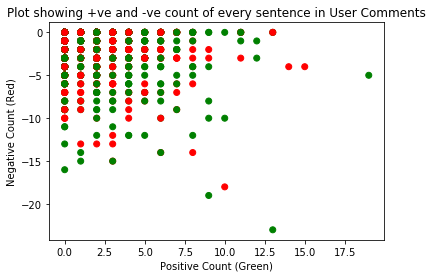

In [15]:
# Now plotting loglog figure.
exportFig = relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/wordAnalysis/result/posNegGraph.png'
x = []
y = []


# Reading CSV file in order to generate loglog figure.
with open(fileName,'r') as csvfile:
    next(csvfile)
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(int(row[0]))
        y.append(int(row[1]))

plt.scatter(x,y, label='Freq vs Rank', color=['green','red'])
plt.xlabel('Positive Count (Green)')
plt.ylabel('Negative Count (Red)')
plt.title('Plot showing +ve and -ve count of every sentence in User Comments')
plt.legend

# storing figure in png file and stored in D drive.
plt.savefig(exportFig, bbox_inches='tight')
plt.show()

- Result is stored in [que[1-2]/ana_[1-3]/wordAnalysis/result/posNegGraph.png]
- The above scatter is showing sentences w.r.t +ve & -ve words.
- Now, In next step I have plotted over all count of +ve & -ve Words on pie chart. See attched image. 

#### Step 7
- Preparing data for Bar Chart based on Scatter Plot.

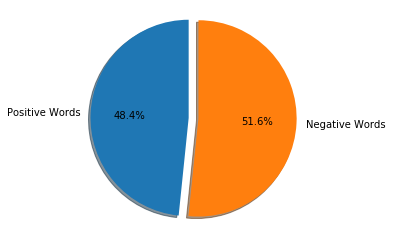

In [16]:
pieFig = relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/wordAnalysis/result/percentWord.png'
positiveWords = sum(x)
negativeWords = sum(y)
negativeWords = str(negativeWords)
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Positive Words', 'Negative Words'
sizes = [positiveWords, negativeWords[1:]]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. '-ve Words')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig(pieFig, bbox_inches='tight')
plt.show()

#### Conclusion from Above Analysis (we can predict)

- In january User use more -ve words w.r.t +ve words.
- The count of -ve word is more may be is vary month to month.
- After seeing scatter plot I can say for every sentence count of -ve words is more than +ve words.